Tutorial on a very small subset of our data (heavily adapted from the original dada2 tutorial https://benjjneb.github.io/dada2/tutorial.html)
We begin by loading **dada2** and **R.utils**

In [1]:
library(dada2); packageVersion("dada2")

Loading required package: Rcpp



[1] ‘1.20.0’

In [2]:
library(R.utils); packageVersion("R.utils")

Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.1 (2020-08-26 16:20:06 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.24.0 (2020-08-26 16:11:58 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.11.0 (2021-09-26 08:30:02 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, inherits, isOpen, nullfile, parse,
    warnings




[1] ‘2.11.0’

Download, unzip and then point to the directory that has our samples

In [3]:
download.file('https://mothur.s3.us-east-2.amazonaws.com/wiki/miseqsopdata.zip', destfile = "./downloads/miseqsopdata.zip")

In [4]:
unzip("./downloads/miseqsopdata.zip", exdir='./downloads/')

In [5]:
path <- "downloads/MiSeq_SOP/" # CHANGE ME to the directory containing the fastq files after unzipping.
list.files(path)

[1] "F3D0_S188_L001_R1_001.fastq"   "F3D0_S188_L001_R2_001.fastq"  
 [3] "F3D1_S189_L001_R1_001.fastq"   "F3D1_S189_L001_R2_001.fastq"  
 [5] "F3D141_S207_L001_R1_001.fastq" "F3D141_S207_L001_R2_001.fastq"
 [7] "F3D142_S208_L001_R1_001.fastq" "F3D142_S208_L001_R2_001.fastq"
 [9] "F3D143_S209_L001_R1_001.fastq" "F3D143_S209_L001_R2_001.fastq"
[11] "F3D144_S210_L001_R1_001.fastq" "F3D144_S210_L001_R2_001.fastq"
[13] "F3D145_S211_L001_R1_001.fastq" "F3D145_S211_L001_R2_001.fastq"
[15] "F3D146_S212_L001_R1_001.fastq" "F3D146_S212_L001_R2_001.fastq"
[17] "F3D147_S213_L001_R1_001.fastq" "F3D147_S213_L001_R2_001.fastq"
[19] "F3D148_S214_L001_R1_001.fastq" "F3D148_S214_L001_R2_001.fastq"
[21] "F3D149_S215_L001_R1_001.fastq" "F3D149_S215_L001_R2_001.fastq"
[23] "F3D150_S216_L001_R1_001.fastq" "F3D150_S216_L001_R2_001.fastq"
[25] "F3D2_S190_L001_R1_001.fastq"   "F3D2_S190_L001_R2_001.fastq"  
[27] "F3D3_S191_L001_R1_001.fastq"   "F3D3_S191_L001_R2_001.fastq"  
[29] "F3D5_S193_L001_R1_001.fastq"   "F3D5_S193_L001_R2_001.fastq"  
[31] "F3D6_S194_L001_R1_001.fastq"   "F3D6_S194_L001_R2_001.fastq"  
[33] "F3D7_S195_L001_R1_001.fastq"   "F3D7_S195_L001_R2_001.fastq"  
[35] "F3D8_S196_L001_R1_001.fastq"   "F3D8_S196_L001_R2_001.fastq"  
[37] "F3D9_S197_L001_R1_001.fastq"   "F3D9_S197_L001_R2_001.fastq"  
[39] "filtered"                      "HMP_MOCK.v35.fasta"           
[41] "Mock_S280_L001_R1_001.fastq"   "Mock_S280_L001_R2_001.fastq"  
[43] "mouse.dpw.metadata"            "mouse.time.design"            
[45] "stability.batch"               "stability.files"

In [6]:
temp_variable_1 <- readLines("./downloads/MiSeq_SOP/F3D0_S188_L001_R1_001.fastq", n=15)
temp_variable_1
#file.remove("raw_sequencing_files/2-D1AM_S21_L001_R1_001.fastq")

[1] "@M00967:43:000000000-A3JHG:1:1101:18327:1699 1:N:0:188"                                                                                                                                                                                                     
 [2] "NACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCTGCCAAGTCAGCGGTAAAATTGCGGGGCTCAACCCCGTACAGCCGTTGAAACTGCCGGGCTCGAGTGGGCGAGAAGTATGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACCCCGATTGCGAAGGCAGCATACCGGCGCCCTACTGACGCTGAGGCACGAAAGTGCGGGGATCAAACAG"
 [3] "+"                                                                                                                                                                                                                                                          
 [4] "#>>AABABBFFFGGGGGGGGGGGGGGGGHHHHHHHGGGHHHHHGHGGGGGGGHGGGGGGHHHHHHHHHHGGGGGHHHHGHGGGGGGHHBGHGDGGGGGHHHGGGGHHHHHHHHGGGGGHG@DHHGHEGGGGGGBFGGEGGGGGGGG.DFEFFFFFFFDCFFFFFFFFFFFFFFFFFFFFFFFFFFDFDFFFEFFCFF?FDFFFFFFFFAFFFFFFFFFFFBDDFFFFFEFADFFFFFBAFFFA?EFFFBFF"
 [5] "@M00967:43:000000000-A3JHG:1:1101:14069:1827 1:N:0:188"                                                                                                                                                                                                     
 [6] "TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCTGCCAAGTCAGCGGTAAAATTGCGGGGCTCAACCCCGTACAGCCGTTGAAACTGCCGGGCTCGAGTGGGCGAGAAGTATGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACCCCGATTGCGAAGGCAGCATACCGGCGCCCTACTGACGCTGAGGCACGAAAGTGCGGGGATCAAACAG"
 [7] "+"                                                                                                                                                                                                                                                          
 [8] "3AA?ABBDBFFBEGGEGGGGAFFGGGGGHHHCGGGGGGHFGHGGCFDEFGGGHGGGEGF1GGFGHHHHHGGEGGHHHHHFGGGGGGHHHHHGGGGCDDGHHGGGFHHHHHHHHCD@CCHGGGGHEHGGG@GFGGGGGGG@BGGGEGCEBFFFBFFB;9@EFFFEFFFFFFFFFFFFAFBBBFFFFFBBBFFFFBBBFFFFFFFFFFFBBBBBBBFFFFFFFFFDDFAFFFFF.AF9/FBBBBB.EAFFE?F"
 [9] "@M00967:43:000000000-A3JHG:1:1101:18044:1900 1:N:0:188"                                                                                                                                                                                                     
[10] "TACGGAGGATGCGAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGCGGTTTAATAAGTCAGTGGTGAAAACTGAGGGCTCAACCCTCAGCCTGCCACTGATACTGTTAGACTTGAGTATGGAAGAGGAGAATGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGATTCTCTGGGCCAAGACTGACGCTGAGGCGCGAAAGCGTGGGGAGCAAACA"
[11] "+"                                                                                                                                                                                                                                                          
[12] "BA@BBBABBFFFGGGGGGGGGGHGGGGGHHHHGHHHGGGGHHHGGGGGGGGGHGGGGGGFHFHHHFHHHHHHGFHHHHHHFHGGFGHHGGHGGHHFHHHHHHHHHHHHHHGHHHGHDHHHHHHHHHGHDGFFHHHDHHHHHHHHHHHHFHHHDGHHGGGGGHHHHHGGGGEGGGGGBF0BGGGGGGGGFFFGGGDGFFFFBCFBFFBFFBEEFFEFFFFFFFFBDA9EEFFF>DFFFFDDFFFADDFFFF."
[13] "@M00967:43:000000000-A3JHG:1:1101:13234:1983 1:N:0:188"                                                                                                                                                                                                     
[14] "TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGCAGGCGGAAGATCAAGTCAGCGGTAAAATTGAGAGGCTCAACCTCTTCGAGCCGTTGAAACTGGTTTTCTTGAGTGAGCGAGAAGTATGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCATACCGGCGCTCAACTGACGCTCATGCACGAAAGTGTGGGTATCGAACAG"
[15] "+"

Structure of fastq files
- Line 1 begins with a '@' character and is followed by a sequence identifier and an optional description (like a FASTA title line).
- Line 2 is the raw sequence letters.
- Line 3 begins with a '+' character and is optionally followed by the same sequence identifier (and any description) again.
- Line 4 encodes the quality values for the sequence in Line 2, and must contain the same number of symbols as letters in the sequence.

Then this repeats for each "read"

The byte representing quality runs from 0x21 (lowest quality; '!' in ASCII) to 0x7e (highest quality; '~' in ASCII). Here are the quality value characters in left-to-right increasing order of quality (ASCII):
~~~
 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~
~~~

In [10]:
# Forward and reverse fastq filenames have format: SAMPLENAME_R1_001.fastq and SAMPLENAME_R2_001.fastq
fnFs <- sort(list.files(path, pattern="_R1_001.fastq", full.names = TRUE))
fnRs <- sort(list.files(path, pattern="_R2_001.fastq", full.names = TRUE))
# Extract sample names, assuming filenames have format: SAMPLENAME_XXX.fastq
sample.names <- sapply(strsplit(basename(fnFs), "_"), `[`, 1)

## Inspect read quality profiles

We start by visualizing the quality profiles of the forward reads:

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


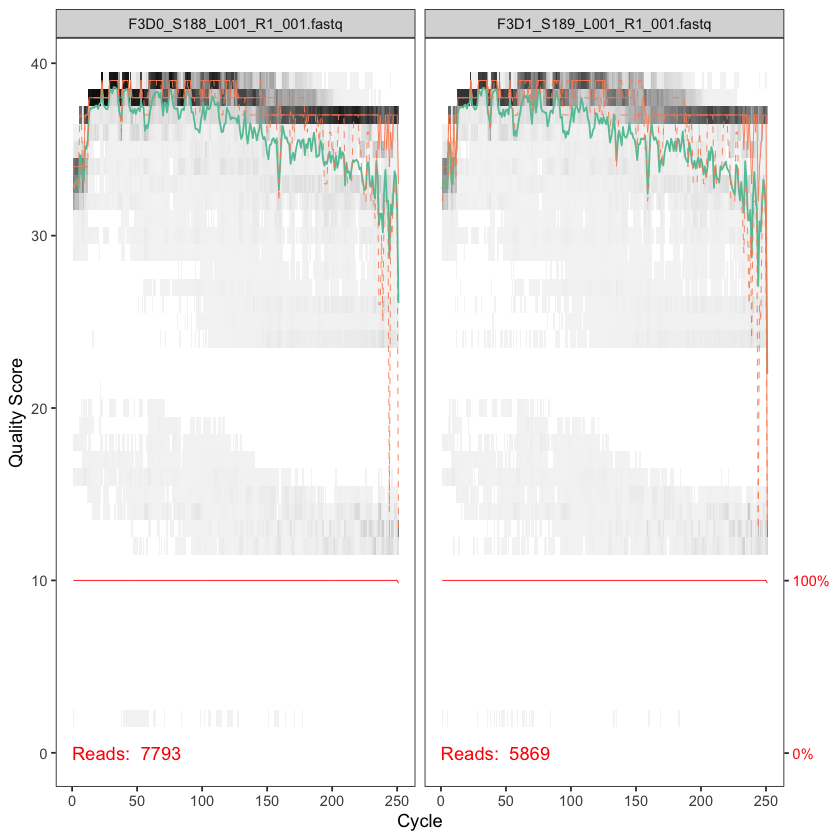

In [11]:
plotQualityProfile(fnFs[1:2])

In gray-scale is a heat map of the frequency of each quality score at each base position. The median quality score at each position is shown by the green line, and the quartiles of the quality score distribution by the orange lines. The red line shows the scaled proportion of reads that extend to at least that position (this is more useful for other sequencing technologies, as Illumina reads are typically all the same lenghth, hence the flat red line).

The forward reads are good quality. We generally advise trimming the last few nucleotides to avoid less well-controlled errors that can arise there. These quality profiles do not suggest that any additional trimming is needed. We will truncate the forward reads at position 240 (trimming the last 10 nucleotides).

Now we visualize the quality profile of the reverse reads:

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


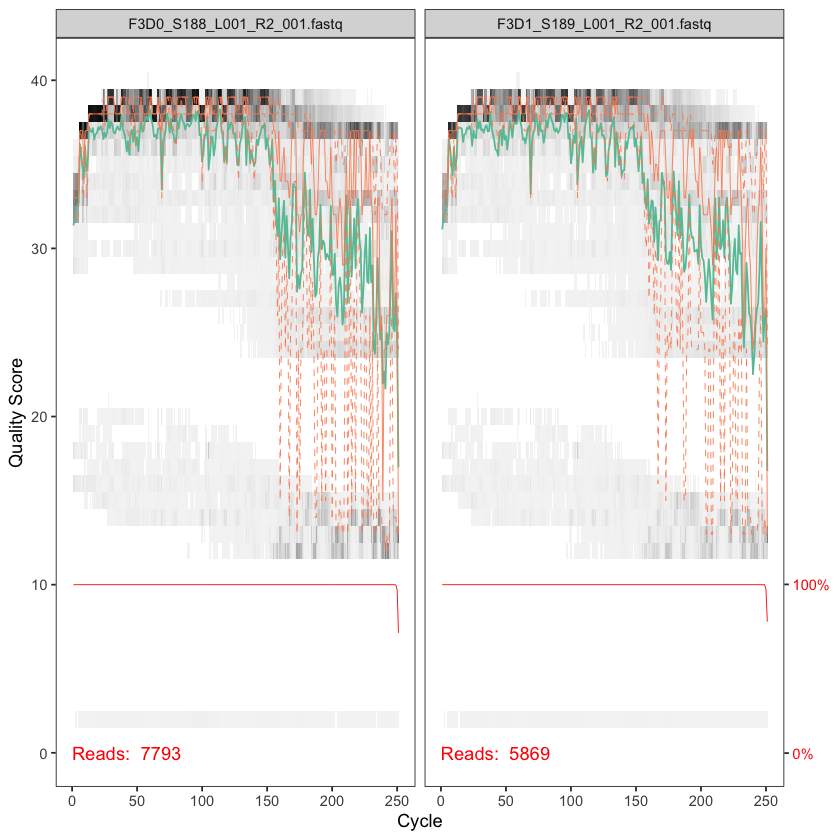

In [12]:
plotQualityProfile(fnRs[1:2])

The reverse reads are of significantly worse quality, especially at the end, which is common in Illumina sequencing. This isn’t too worrisome, as DADA2 incorporates quality information into its error model which makes the algorithm robust to lower quality sequence, but trimming as the average qualities crash will improve the algorithm’s sensitivity to rare sequence variants. Based on these profiles, we will truncate the reverse reads at position 160 where the quality distribution crashes.

## Filter and trim
Assign the filenames for the filtered fastq.gz files.

In [13]:
# Place filtered files in filtered/ subdirectory
filtFs <- file.path(path, "filtered", paste0(sample.names, "_F_filt.fastq.gz"))
filtRs <- file.path(path, "filtered", paste0(sample.names, "_R_filt.fastq.gz"))
names(filtFs) <- sample.names
names(filtRs) <- sample.names

We’ll use standard filtering parameters: `maxN=0` (DADA2 requires no Ns), `truncQ=2`, `rm.phix=TRUE` and `maxEE=2`. The `maxEE` parameter sets the maximum number of “expected errors” allowed in a read, which is a better filter than simply averaging quality scores.

In [14]:
out <- filterAndTrim(fnFs, filtFs, fnRs, filtRs, truncLen=c(240,160),
              maxN=0, maxEE=c(2,2), truncQ=2, rm.phix=TRUE,
              compress=TRUE, multithread=TRUE) # On Windows set multithread=FALSE
head(out)

,reads.in,reads.out
F3D0_S188_L001_R1_001.fastq,7793,7113
F3D1_S189_L001_R1_001.fastq,5869,5299
F3D141_S207_L001_R1_001.fastq,5958,5463
F3D142_S208_L001_R1_001.fastq,3183,2914
F3D143_S209_L001_R1_001.fastq,3178,2941
F3D144_S210_L001_R1_001.fastq,4827,4312


## Learn the Error Rates
The DADA2 algorithm makes use of a parametric error model (`err`) and every amplicon dataset has a different set of error rates. The  `learnErrors` method learns this error model from the data, by alternating estimation of the error rates and inference of sample composition until they converge on a jointly consistent solution. As in many machine-learning problems, the algorithm must begin with an initial guess, for which the maximum possible error rates in this data are used (the error rates if only the most abundant sequence is correct and all the rest are errors).

In [15]:
errF <- learnErrors(filtFs, multithread=TRUE)

33514080 total bases in 139642 reads from 20 samples will be used for learning the error rates.


In [16]:
errR <- learnErrors(filtRs, multithread=TRUE)

22342720 total bases in 139642 reads from 20 samples will be used for learning the error rates.


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


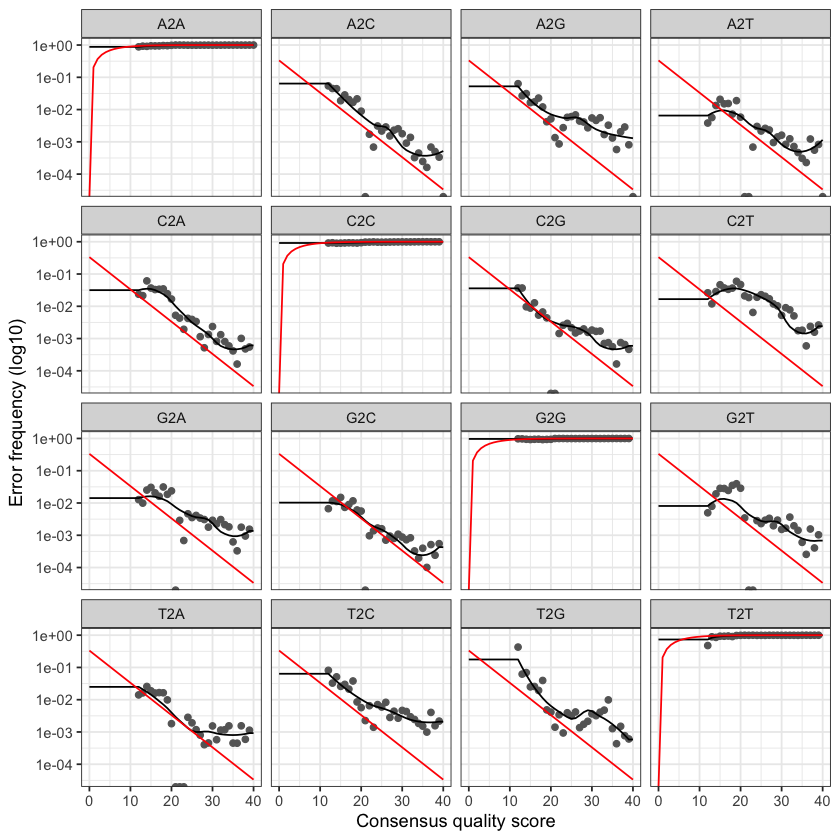

In [17]:
plotErrors(errF, nominalQ=TRUE)

The error rates for each possible transition (A→C, A→G, …) are shown. Points are the observed error rates for each consensus quality score. The black line shows the estimated error rates after convergence of the machine-learning algorithm. The red line shows the error rates expected under the nominal definition of the Q-score. Here the estimated error rates (black line) are a good fit to the observed rates (points), and the error rates drop with increased quality as expected. Everything looks reasonable and we proceed with confidence.

## Dereplication
Dereplication combines all identical sequencing reads into into “unique sequences” with a corresponding “abundance” equal to the number of reads with that unique sequence. Dereplication substantially reduces computation time by eliminating redundant comparisons.

Dereplication in the DADA2 pipeline has one crucial addition from other pipelines: DADA2 retains a summary of the quality information associated with each unique sequence. The consensus quality profile of a unique sequence is the average of the positional qualities from the dereplicated reads. These quality profiles inform the error model of the subsequent sample inference step, significantly increasing DADA2’s accuracy.

In [18]:
derepFs <- derepFastq(filtFs, verbose=TRUE)
derepRs <- derepFastq(filtRs, verbose=TRUE)
# Name the derep-class objects by the sample names
names(derepFs) <- sample.names
names(derepRs) <- sample.names

Dereplicating sequence entries in Fastq file: downloads/MiSeq_SOP//filtered/F3D0_F_filt.fastq.gz

Encountered 1979 unique sequences from 7113 total sequences read.

Dereplicating sequence entries in Fastq file: downloads/MiSeq_SOP//filtered/F3D1_F_filt.fastq.gz

Encountered 1639 unique sequences from 5299 total sequences read.

Dereplicating sequence entries in Fastq file: downloads/MiSeq_SOP//filtered/F3D141_F_filt.fastq.gz

Encountered 1477 unique sequences from 5463 total sequences read.

Dereplicating sequence entries in Fastq file: downloads/MiSeq_SOP//filtered/F3D142_F_filt.fastq.gz

Encountered 904 unique sequences from 2914 total sequences read.

Dereplicating sequence entries in Fastq file: downloads/MiSeq_SOP//filtered/F3D143_F_filt.fastq.gz

Encountered 939 unique sequences from 2941 total sequences read.

Dereplicating sequence entries in Fastq file: downloads/MiSeq_SOP//filtered/F3D144_F_filt.fastq.gz

Encountered 1267 unique sequences from 4312 total sequences read.

Dere

## Sample Inference
We are now ready to apply the core sample inference algorithm to the dereplicated data.

In [19]:
dadaFs <- dada(derepFs, err=errF, multithread=TRUE)

Sample 1 - 7113 reads in 1979 unique sequences.
Sample 2 - 5299 reads in 1639 unique sequences.
Sample 3 - 5463 reads in 1477 unique sequences.
Sample 4 - 2914 reads in 904 unique sequences.
Sample 5 - 2941 reads in 939 unique sequences.
Sample 6 - 4312 reads in 1267 unique sequences.
Sample 7 - 6741 reads in 1756 unique sequences.
Sample 8 - 4560 reads in 1438 unique sequences.
Sample 9 - 15637 reads in 3590 unique sequences.
Sample 10 - 11413 reads in 2762 unique sequences.
Sample 11 - 12017 reads in 3021 unique sequences.
Sample 12 - 5032 reads in 1566 unique sequences.
Sample 13 - 18075 reads in 3707 unique sequences.
Sample 14 - 6250 reads in 1479 unique sequences.
Sample 15 - 4052 reads in 1195 unique sequences.
Sample 16 - 7369 reads in 1832 unique sequences.
Sample 17 - 4765 reads in 1183 unique sequences.
Sample 18 - 4871 reads in 1382 unique sequences.
Sample 19 - 6504 reads in 1709 unique sequences.
Sample 20 - 4314 reads in 897 unique sequences.


In [20]:
dadaRs <- dada(derepRs, err=errR, multithread=TRUE)

Sample 1 - 7113 reads in 1660 unique sequences.
Sample 2 - 5299 reads in 1349 unique sequences.
Sample 3 - 5463 reads in 1335 unique sequences.
Sample 4 - 2914 reads in 853 unique sequences.
Sample 5 - 2941 reads in 880 unique sequences.
Sample 6 - 4312 reads in 1286 unique sequences.
Sample 7 - 6741 reads in 1803 unique sequences.
Sample 8 - 4560 reads in 1265 unique sequences.
Sample 9 - 15637 reads in 3414 unique sequences.
Sample 10 - 11413 reads in 2522 unique sequences.
Sample 11 - 12017 reads in 2771 unique sequences.
Sample 12 - 5032 reads in 1415 unique sequences.
Sample 13 - 18075 reads in 3290 unique sequences.
Sample 14 - 6250 reads in 1390 unique sequences.
Sample 15 - 4052 reads in 1134 unique sequences.
Sample 16 - 7369 reads in 1635 unique sequences.
Sample 17 - 4765 reads in 1084 unique sequences.
Sample 18 - 4871 reads in 1161 unique sequences.
Sample 19 - 6504 reads in 1502 unique sequences.
Sample 20 - 4314 reads in 732 unique sequences.


In [21]:
dadaFs[[1]]

sequence,abundance,n0,n1,nunq,pval,birth_from,birth_pval,birth_fold,birth_ham,birth_qave
<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGCAGGCGGAAGATCAAGTCAGCGGTAAAATTGAGAGGCTCAACCTCTTCGAGCCGTTGAAACTGGTTTTCTTGAGTGAGCGAGAAGTATGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCATACCGGCGCTCAACTGACGCTCATGCACGAAAGTGTGG,586,456,81,94,0,NA,NA,NA,NA,NA
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCTGCCAAGTCAGCGGTAAAATTGCGGGGCTCAACCCCGTACAGCCGTTGAAACTGCCGGGCTCGAGTGGGCGAGAAGTATGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACCCCGATTGCGAAGGCAGCATACCGGCGCCCTACTGACGCTGAGGCACGAAAGTGCGG,497,379,69,96,0,1,0,1.240771e+74,25,37.04000
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGGCTGTTAAGTCAGCGGTCAAATGTCGGGGCTCAACCCCGGCCTGCCGTTGAAACTGGCGGCCTCGAGTGGGCGAGAAGTATGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCATACCGGCGCCCGACTGACGCTGAGGCACGAAAGCGTGG,454,353,64,77,0,2,0,7.221513e+44,15,36.80000
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGGCTTTTAAGTCAGCGGTAAAAATTCGGGGCTCAACCCCGTCCGGCCGTTGAAACTGGGGGCCTTGAGTGGGCGAGAAGAAGGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACCCCGATTGCGAAGGCAGCCTTCCGGCGCCCTACTGACGCTGAGGCACGAAAGTGCGG,447,336,66,88,0,3,0,3.895364e+47,16,36.50000
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGCAGGCGGACTCTCAAGTCAGCGGTCAAATCGCGGGGCTCAACCCCGTTCCGCCGTTGAAACTGGGAGCCTTGAGTGCGCGAGAAGTAGGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCCTACCGGCGCGCAACTGACGCTCATGCACGAAAGCGTGG,348,280,38,63,0,1,0,4.567543e+54,18,37.44444
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGGATGCCAAGTCAGCGGTAAAAAAGCGGTGCTCAACGCCGTCGAGCCGTTGAAACTGGCGTTCTTGAGTGGGCGAGAAGTATGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCATACCGGCGCCCTACTGACGCTGAGGCACGAAAGCGTGG,289,218,37,64,0,2,0,4.918815e+45,15,36.73333
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCTGCCAAGTCAGCGGTAAAATTGCGGGGCTCAACCCCGTACAGCCGTTGAAACTGCCGGGCTCGAGTGGGCGAGAAGTATGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACCCCGATTGCGAAGGCAGCATACCGGCGCCCGACTGACGCTGAGGCACGAAAGTGCGG,230,170,39,46,0,2,0,2.542394e+02,1,35.00000
TACGGAGGATTCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGTTCGATAAGTTAGAGGTGAAATCCCGGGGCTCAACTCCGGCACTGCCTCTGATACTGTCGGGCTAGAGTTTAGTTGCGGTAGGCGGAATGTATGGTGTAGCGGTGAAATGCATAGAGATCATACAGAACACCGATTGCGAAGGCAGCTTACCAAACTACGACTGACGTTGAGGCACGAAAGCGTG,184,137,23,41,0,1,0,6.864450e+142,48,36.91667
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGATTGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGAAACTGGCAGTCTTGAGTACAGTAGAGGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTGGACTGCAACTGACACTGATGCTCGAAAGTGTG,155,122,18,28,0,1,0,1.321308e+120,40,37.90000


## Merge paired reads
We now merge the forward and reverse reads together to obtain the full denoised sequences. Merging is performed by aligning the denoised forward reads with the reverse-complement of the corresponding denoised reverse reads, and then constructing the merged “contig” sequences. By default, merged sequences are only output if the forward and reverse reads overlap by at least 12 bases, and are identical to each other in the overlap region.

In [22]:
mergers <- mergePairs(dadaFs, derepFs, dadaRs, derepRs, verbose=TRUE)
# Inspect the merger data.frame from the first sample
head(mergers[[1]])

6540 paired-reads (in 107 unique pairings) successfully merged out of 6891 (in 197 pairings) input.

5028 paired-reads (in 101 unique pairings) successfully merged out of 5190 (in 157 pairings) input.

4986 paired-reads (in 81 unique pairings) successfully merged out of 5267 (in 166 pairings) input.

2595 paired-reads (in 52 unique pairings) successfully merged out of 2754 (in 108 pairings) input.

2553 paired-reads (in 60 unique pairings) successfully merged out of 2785 (in 119 pairings) input.

3646 paired-reads (in 55 unique pairings) successfully merged out of 4109 (in 157 pairings) input.

6079 paired-reads (in 81 unique pairings) successfully merged out of 6514 (in 198 pairings) input.

3968 paired-reads (in 91 unique pairings) successfully merged out of 4388 (in 187 pairings) input.

14233 paired-reads (in 143 unique pairings) successfully merged out of 15355 (in 352 pairings) input.

10528 paired-reads (in 120 unique pairings) successfully merged out of 11165 (in 278 pairings) 

,sequence,abundance,forward,reverse,nmatch,nmismatch,nindel,prefer,accept
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<lgl>
1,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGCAGGCGGAAGATCAAGTCAGCGGTAAAATTGAGAGGCTCAACCTCTTCGAGCCGTTGAAACTGGTTTTCTTGAGTGAGCGAGAAGTATGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCATACCGGCGCTCAACTGACGCTCATGCACGAAAGTGTGGGTATCGAACAGG,579,1,1,148,0,0,1,TRUE
2,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCTGCCAAGTCAGCGGTAAAATTGCGGGGCTCAACCCCGTACAGCCGTTGAAACTGCCGGGCTCGAGTGGGCGAGAAGTATGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACCCCGATTGCGAAGGCAGCATACCGGCGCCCTACTGACGCTGAGGCACGAAAGTGCGGGGATCAAACAGG,470,2,2,148,0,0,2,TRUE
3,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGGCTGTTAAGTCAGCGGTCAAATGTCGGGGCTCAACCCCGGCCTGCCGTTGAAACTGGCGGCCTCGAGTGGGCGAGAAGTATGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCATACCGGCGCCCGACTGACGCTGAGGCACGAAAGCGTGGGTATCGAACAGG,449,3,4,148,0,0,1,TRUE
4,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGGCTTTTAAGTCAGCGGTAAAAATTCGGGGCTCAACCCCGTCCGGCCGTTGAAACTGGGGGCCTTGAGTGGGCGAGAAGAAGGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACCCCGATTGCGAAGGCAGCCTTCCGGCGCCCTACTGACGCTGAGGCACGAAAGTGCGGGGATCGAACAGG,430,4,3,148,0,0,2,TRUE
5,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGCAGGCGGACTCTCAAGTCAGCGGTCAAATCGCGGGGCTCAACCCCGTTCCGCCGTTGAAACTGGGAGCCTTGAGTGCGCGAGAAGTAGGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCCTACCGGCGCGCAACTGACGCTCATGCACGAAAGCGTGGGTATCGAACAGG,345,5,6,148,0,0,1,TRUE
6,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGGATGCCAAGTCAGCGGTAAAAAAGCGGTGCTCAACGCCGTCGAGCCGTTGAAACTGGCGTTCTTGAGTGGGCGAGAAGTATGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCATACCGGCGCCCTACTGACGCTGAGGCACGAAAGCGTGGGTATCGAACAGG,282,6,5,148,0,0,2,TRUE


## Construct sequence table
We can now construct an amplicon sequence variant table (ASV) table, a higher-resolution version of the OTU table produced by traditional methods

In [23]:
seqtab <- makeSequenceTable(mergers)
dim(seqtab)

[1]  20 293

In [24]:
# Inspect distribution of sequence lengths
table(nchar(getSequences(seqtab)))


251 252 253 254 255 
  1  88 196   6   2 

The sequence table is a matrix with rows corresponding to (and named by) the samples, and columns corresponding to (and named by) the sequence variants. This table contains 398 ASVs, and the lengths of our merged sequences all fall within the expected range for this V4 amplicon.

## Remove chimeras
The core dada method corrects substitution and indel errors, but chimeras remain. Fortunately, the accuracy of the sequence variants after denoising makes identifying chimeras simpler than it is when dealing with fuzzy OTUs. Chimeric sequences are identified if they can be exactly reconstructed by combining a left-segment and a right-segment from two more abundant “parent” sequences.

In [25]:
seqtab.nochim <- removeBimeraDenovo(seqtab, method="consensus", multithread=TRUE, verbose=TRUE)
dim(seqtab.nochim)

Identified 61 bimeras out of 293 input sequences.



[1]  20 232

In [26]:
sum(seqtab.nochim)/sum(seqtab)

[1] 0.9640374

The frequency of chimeric sequences varies substantially from dataset to dataset, and depends on on factors including experimental procedures and sample complexity. Here chimeras make up 81% of the merged sequence variants, but when we account for the abundances of those variants we see they account for only about 13% of the merged sequence reads.

## Track reads through the pipeline
As a final check of our progress, we’ll look at the number of reads that made it through each step in the pipeline:

In [27]:
getN <- function(x) sum(getUniques(x))
track <- cbind(out, sapply(dadaFs, getN), sapply(dadaRs, getN), sapply(mergers, getN), rowSums(seqtab.nochim))
# If processing a single sample, remove the sapply calls: e.g. replace sapply(dadaFs, getN) with getN(dadaFs)
colnames(track) <- c("input", "filtered", "denoisedF", "denoisedR", "merged", "nonchim")
rownames(track) <- sample.names
head(track)

,input,filtered,denoisedF,denoisedR,merged,nonchim
F3D0,7793,7113,6976,6979,6540,6528
F3D1,5869,5299,5227,5239,5028,5017
F3D141,5958,5463,5331,5357,4986,4863
F3D142,3183,2914,2799,2830,2595,2521
F3D143,3178,2941,2822,2868,2553,2519
F3D144,4827,4312,4151,4228,3646,3507


## Assign taxonomy
It is common at this point, especially in 16S/18S/ITS amplicon sequencing, to assign taxonomy to the sequence variants. The DADA2 package provides a native implementation of the naive Bayesian classifier method for this purpose. The assignTaxonomy function takes as input a set of sequences to be classified and a training set of reference sequences with known taxonomy, and outputs taxonomic assignments with at least minBoot bootstrap confidence.

We maintain formatted training fastas for the RDP training set, GreenGenes clustered at 97% identity, and the Silva reference database, and additional trainings fastas suitable for protists and certain specific environments have been contributed. For fungal taxonomy, the General Fasta release files from the UNITE ITS database can be used as is. Thefile silva_nr_v128_train_set.fa.gz file should allready be in your local directory

In [29]:
destfile='silva_nr99_v138.1_train_set.fa.gz'
fileURL <-'https://zenodo.org/record/4587955/files/silva_nr99_v138.1_train_set.fa.gz'   
if(!file.exists(destfile)) {
    download.file(fileURL ,destfile,method="auto") }

In [30]:
taxa <- assignTaxonomy(seqtab.nochim, "silva_nr99_v138.1_train_set.fa.gz", multithread=FALSE)
colnames(taxa) <- c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus")


In [31]:
head(taxa)

,Kingdom,Phylum,Class,Order,Family,Genus
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGCAGGCGGAAGATCAAGTCAGCGGTAAAATTGAGAGGCTCAACCTCTTCGAGCCGTTGAAACTGGTTTTCTTGAGTGAGCGAGAAGTATGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCATACCGGCGCTCAACTGACGCTCATGCACGAAAGTGTGGGTATCGAACAGG,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Muribaculaceae,NA
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGCAGGCGGACTCTCAAGTCAGCGGTCAAATCGCGGGGCTCAACCCCGTTCCGCCGTTGAAACTGGGAGCCTTGAGTGCGCGAGAAGTAGGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCCTACCGGCGCGCAACTGACGCTCATGCACGAAAGCGTGGGTATCGAACAGG,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Muribaculaceae,NA
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGGCTGTTAAGTCAGCGGTCAAATGTCGGGGCTCAACCCCGGCCTGCCGTTGAAACTGGCGGCCTCGAGTGGGCGAGAAGTATGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCATACCGGCGCCCGACTGACGCTGAGGCACGAAAGCGTGGGTATCGAACAGG,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Muribaculaceae,NA
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGGCTTTTAAGTCAGCGGTAAAAATTCGGGGCTCAACCCCGTCCGGCCGTTGAAACTGGGGGCCTTGAGTGGGCGAGAAGAAGGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACCCCGATTGCGAAGGCAGCCTTCCGGCGCCCTACTGACGCTGAGGCACGAAAGTGCGGGGATCGAACAGG,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Muribaculaceae,NA
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGATTGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGAAACTGGCAGTCTTGAGTACAGTAGAGGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTGGACTGCAACTGACACTGATGCTCGAAAGTGTGGGTATCAAACAGG,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCTGCCAAGTCAGCGGTAAAATTGCGGGGCTCAACCCCGTACAGCCGTTGAAACTGCCGGGCTCGAGTGGGCGAGAAGTATGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACCCCGATTGCGAAGGCAGCATACCGGCGCCCTACTGACGCTGAGGCACGAAAGTGCGGGGATCAAACAGG,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Muribaculaceae,NA


## Handoff to phyloseq
The phyloseq R package is a powerful framework for further analysis of microbiome data. We now demonstrate how to straightforwardly import the tables produced by the DADA2 pipeline into phyloseq.

In [32]:
library(phyloseq); packageVersion("phyloseq")

[1] ‘1.36.0’

We can construct a phyloseq object and simple sample `data.frame` from the information encoded in the filenames. Our goal is to have a sequence to OTU or ASV map for convenient reference to sequences and then to ultimatly build a table for downstream analysis giving us the number of reads for each OTU sequence in each sample

In [33]:
ps0 <- phyloseq(tax_table(taxa), otu_table(seqtab.nochim, taxa_are_rows = FALSE))

otuToSeqMapping = data.frame(sequence=names(getUniques(seqtab.nochim)),otuName = paste("OTU_",seq(1:length(getUniques(seqtab.nochim))),sep=""))

taxatable = tax_table(ps0)
OTU_table = cbind(otuToSeqMapping,t(otu_table(ps0)),taxatable)
rownames(OTU_table)<-NULL

In [34]:
head(otuToSeqMapping)

,sequence,otuName
,<chr>,<chr>
1,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGCAGGCGGAAGATCAAGTCAGCGGTAAAATTGAGAGGCTCAACCTCTTCGAGCCGTTGAAACTGGTTTTCTTGAGTGAGCGAGAAGTATGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCATACCGGCGCTCAACTGACGCTCATGCACGAAAGTGTGGGTATCGAACAGG,OTU_1
2,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGCAGGCGGACTCTCAAGTCAGCGGTCAAATCGCGGGGCTCAACCCCGTTCCGCCGTTGAAACTGGGAGCCTTGAGTGCGCGAGAAGTAGGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCCTACCGGCGCGCAACTGACGCTCATGCACGAAAGCGTGGGTATCGAACAGG,OTU_2
3,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGGCTGTTAAGTCAGCGGTCAAATGTCGGGGCTCAACCCCGGCCTGCCGTTGAAACTGGCGGCCTCGAGTGGGCGAGAAGTATGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCATACCGGCGCCCGACTGACGCTGAGGCACGAAAGCGTGGGTATCGAACAGG,OTU_3
4,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGGCTTTTAAGTCAGCGGTAAAAATTCGGGGCTCAACCCCGTCCGGCCGTTGAAACTGGGGGCCTTGAGTGGGCGAGAAGAAGGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACCCCGATTGCGAAGGCAGCCTTCCGGCGCCCTACTGACGCTGAGGCACGAAAGTGCGGGGATCGAACAGG,OTU_4
5,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGATTGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGAAACTGGCAGTCTTGAGTACAGTAGAGGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTGGACTGCAACTGACACTGATGCTCGAAAGTGTGGGTATCAAACAGG,OTU_5
6,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCTGCCAAGTCAGCGGTAAAATTGCGGGGCTCAACCCCGTACAGCCGTTGAAACTGCCGGGCTCGAGTGGGCGAGAAGTATGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACCCCGATTGCGAAGGCAGCATACCGGCGCCCTACTGACGCTGAGGCACGAAAGTGCGGGGATCAAACAGG,OTU_6


In [35]:
head(OTU_table)

,sequence,otuName,F3D0,F3D1,F3D141,F3D142,F3D143,F3D144,F3D145,F3D146,⋯,F3D7,F3D8,F3D9,Mock,Kingdom,Phylum,Class,Order,Family,Genus
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGCAGGCGGAAGATCAAGTCAGCGGTAAAATTGAGAGGCTCAACCTCTTCGAGCCGTTGAAACTGGTTTTCTTGAGTGAGCGAGAAGTATGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCATACCGGCGCTCAACTGACGCTCATGCACGAAAGTGTGGGTATCGAACAGG,OTU_1,579,405,444,289,228,421,645,325,⋯,648,272,511,0,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Muribaculaceae,NA
2,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGCAGGCGGACTCTCAAGTCAGCGGTCAAATCGCGGGGCTCAACCCCGTTCCGCCGTTGAAACTGGGAGCCTTGAGTGCGCGAGAAGTAGGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCCTACCGGCGCGCAACTGACGCTCATGCACGAAAGCGTGGGTATCGAACAGG,OTU_2,345,353,362,304,176,277,489,230,⋯,504,352,423,0,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Muribaculaceae,NA
3,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGGCTGTTAAGTCAGCGGTCAAATGTCGGGGCTCAACCCCGGCCTGCCGTTGAAACTGGCGGCCTCGAGTGGGCGAGAAGTATGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCATACCGGCGCCCGACTGACGCTGAGGCACGAAAGCGTGGGTATCGAACAGG,OTU_3,449,231,345,158,204,302,522,254,⋯,438,349,482,0,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Muribaculaceae,NA
4,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGGCTTTTAAGTCAGCGGTAAAAATTCGGGGCTCAACCCCGTCCGGCCGTTGAAACTGGGGGCCTTGAGTGGGCGAGAAGAAGGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACCCCGATTGCGAAGGCAGCCTTCCGGCGCCCTACTGACGCTGAGGCACGAAAGTGCGGGGATCGAACAGG,OTU_4,430,69,502,164,231,357,583,388,⋯,314,147,206,0,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Muribaculaceae,NA
5,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGATTGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAACCGTAAAATTGCAGTTGAAACTGGCAGTCTTGAGTACAGTAGAGGTGGGCGGAATTCGTGGTGTAGCGGTGAAATGCTTAGATATCACGAAGAACTCCGATTGCGAAGGCAGCTCACTGGACTGCAACTGACACTGATGCTCGAAAGTGTGGGTATCAAACAGG,OTU_5,154,140,189,180,130,104,307,179,⋯,470,582,596,0,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides
6,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCTGCCAAGTCAGCGGTAAAATTGCGGGGCTCAACCCCGTACAGCCGTTGAAACTGCCGGGCTCGAGTGGGCGAGAAGTATGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACCCCGATTGCGAAGGCAGCATACCGGCGCCCTACTGACGCTGAGGCACGAAAGTGCGGGGATCAAACAGG,OTU_6,470,41,331,181,244,353,476,275,⋯,11,0,0,0,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Muribaculaceae,NA


In [36]:
dir.create('output')

Warning message in dir.create("output"):
“'output' already exists”


In [37]:
write.table(otuToSeqMapping,file.path("output/otuToSeqMapping.tsv"),row.names=F,sep="\t")
write.table(cbind(otuToSeqMapping,t(otu_table(ps0)),taxatable),file.path("output/sequence_rawReadNumber_table_ps0_withoutFilter.tsv"),row.names=F,sep="\t")